In [11]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

train_data = pd.read_excel(r'C:\Users\HP\Downloads\training.xlsx', sheet_name='Sheet1')
test_data = pd.read_excel(r'C:\Users\HP\Downloads\scoring.xlsx', sheet_name='Sheet1')

target = 'Vehicle Population'
features = [col for col in train_data.columns if col != target]

X_train = train_data[features]
y_train = train_data[target]
X_test = test_data[features]

numerical_cols = X_train.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = X_train.select_dtypes(include=['object', 'category']).columns.tolist()

numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Convert all categorical columns to string type
for col in categorical_cols:
    X_train.loc[:, col] = X_train[col].astype(str)
    X_test.loc[:, col] = X_test[col].astype(str)

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)

from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error, r2_score

def evaluate_model(model, X_train, y_train):
    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)

    rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
    r2_train = r2_score(y_train, y_pred_train)

    print(f"{model.__class__.__name__} Results:")
    print(f"RMSE (Train): {rmse_train:.4f}")
    print(f"R^2 (Train): {r2_train:.4f}\n")

lr_model = LinearRegression()
evaluate_model(lr_model, X_train_preprocessed, y_train)

ridge_model = Ridge(alpha=1.0)
evaluate_model(ridge_model, X_train_preprocessed, y_train)


LinearRegression Results:
RMSE (Train): 16925.4668
R^2 (Train): 0.1924

Ridge Results:
RMSE (Train): 16925.4785
R^2 (Train): 0.1924



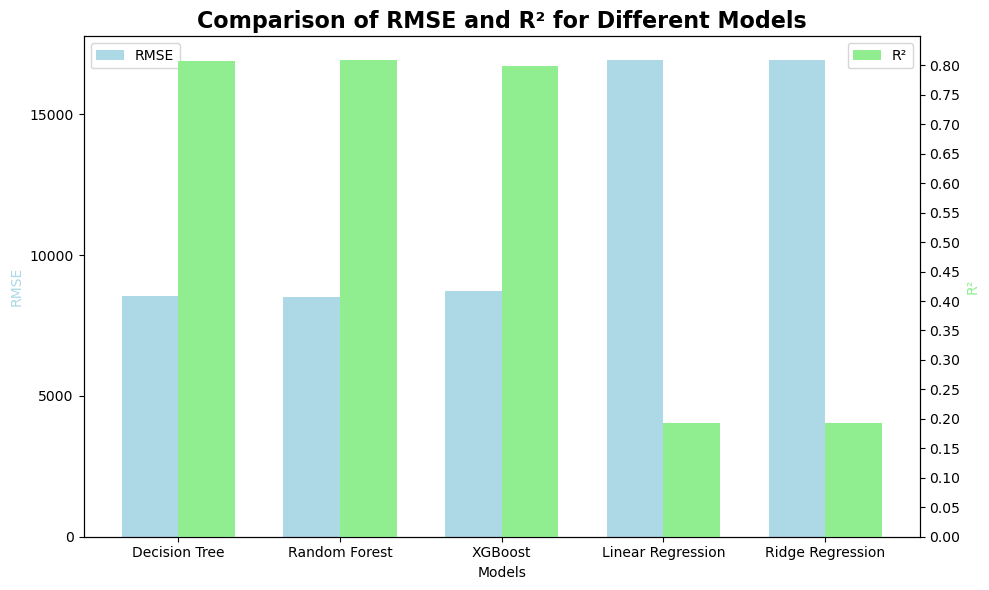

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.ticker import MultipleLocator

models = ['Decision Tree', 'Random Forest', 'XGBoost', 'Linear Regression', 'Ridge Regression']
rmse_values = [8543.738388, 8512.420869, 8725.302230, 16925.4668, 16925.4785]
r2_values = [0.807370, 0.808780, 0.799096, 0.1924, 0.1924]

fig, ax1 = plt.subplots(figsize=(10, 6))

bar_width = 0.35
index = np.arange(len(models))

rects1 = ax1.bar(index, rmse_values, bar_width, label='RMSE', color='lightblue')

ax2 = ax1.twinx()

rects2 = ax2.bar(index + bar_width, r2_values, bar_width, label='R²', color='lightgreen')

ax1.set_xlabel('Models')
ax1.set_ylabel('RMSE', color='lightblue')
ax2.set_ylabel('R²', color='lightgreen')
ax1.set_xticks(index + bar_width / 2)
ax1.set_xticklabels(models)
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

ax1.yaxis.set_major_locator(MultipleLocator(5000)) 
ax2.yaxis.set_major_locator(MultipleLocator(0.05))  

plt.title('Comparison of RMSE and R² for Different Models', fontsize=16, fontweight='bold')

plt.tight_layout()
plt.show()
